## Titanic
https://www.kaggle.com/c/titanic/data

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
train_df = pd.read_csv(r"C:\Users\lonj7\MyWork\Data\Titanic\titanic\train.csv")
test_df = pd.read_csv(r"C:\Users\lonj7\MyWork\Data\Titanic\titanic\test.csv")

In [16]:
# check the fist 5 rows
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Test_df doesn't include Survived feature. \
Defined problem: predict the Survived feature.

Let's check the data type of each feature.

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goncalves, Mr. Manuel Estanslas",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


**Some part of data was missed:** \
Age: 714 / 891 \
Cabin: 204 / 891 \
Embakred: 889 / 891 

**Data that I need to fill:** \
Age, Embarked. (need to be checked)

**Data that I will delete:** \
Cabin has too many missed value to use. \
Passenger ID is just a list of number.

In [32]:
# delete the feature:
train_df.drop(['Cabin', 'PassengerId'], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Data Visualization

### 1. Total Survived rate.
### 2. Relation between Survived rate and other features.
### 3. Using Sci Kit learn to predict Survived.

#### 1-1. Total Survived rate

In [81]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [55]:
train_df['Survived'].mean()
# survive rate is around 38.4 %

0.3838383838383838

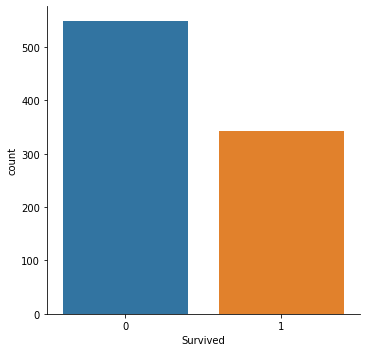

In [49]:
# visualization

sns.catplot('Survived', data=train_df, kind='count')

#### 1-2. Survived vs Pclass

In [84]:
train_df['Pclass'].value_counts(dropna=True, ascending=False)
# total number of passenger of each class

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [94]:
train_df.groupby(by='Pclass').sum().Survived
# 1st Class: 63.0 %
# 2nd Class: 47.3 %
# 3rd Class: 24.2 %

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

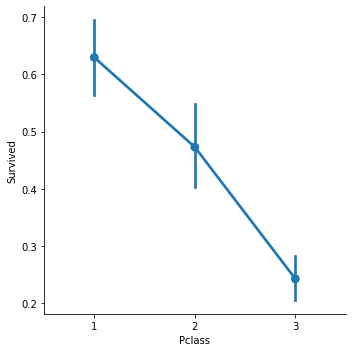

In [51]:
# comparing: relation-plot

sns.catplot(x="Pclass", y='Survived', data=train_df, kind='point')
# higher Pclass' survive rate is higer than lower class

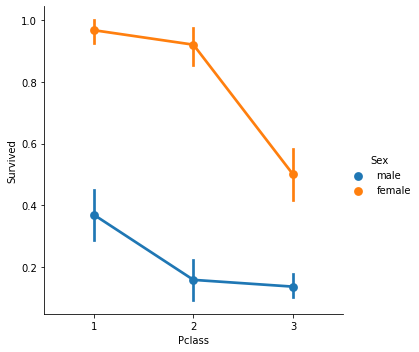

In [54]:
sns.catplot(x="Pclass", y='Survived', data=train_df, kind='point', hue='Sex')
# most of 1st and 2nd class of female passengers were survived

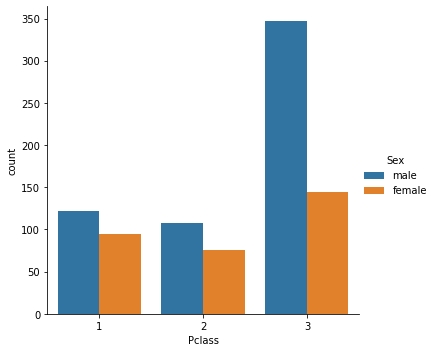

In [56]:
# Let's check the number(or rate) of passenger of each class
sns.catplot('Pclass', kind='count', data=train_df, hue='Sex')

#### 1-4. Survived vs Embarked

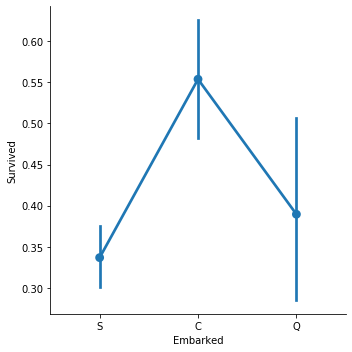

In [63]:
sns.catplot('Embarked', 'Survived', data=train_df, kind='point')

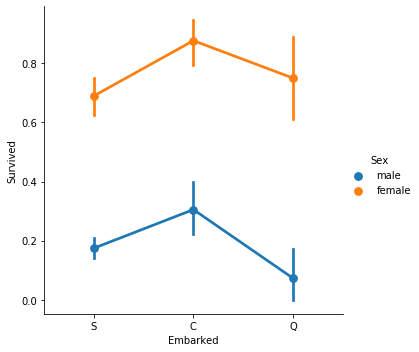

In [136]:
sns.catplot('Embarked', 'Survived', data=train_df, kind='point', hue='Sex')

In [137]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### 1-5. Age

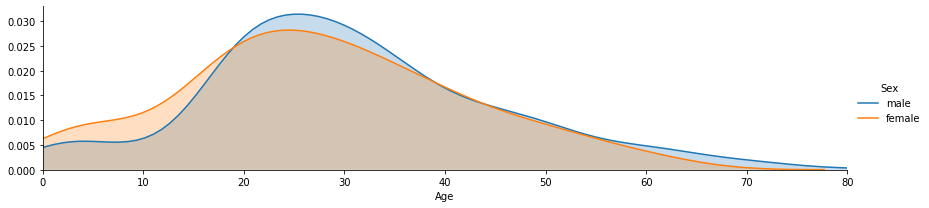

In [150]:
# distribution of age.
fig = sns.FacetGrid(train_df, hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
fig.set(xlim=(0,train_df['Age'].max()))

fig.add_legend()

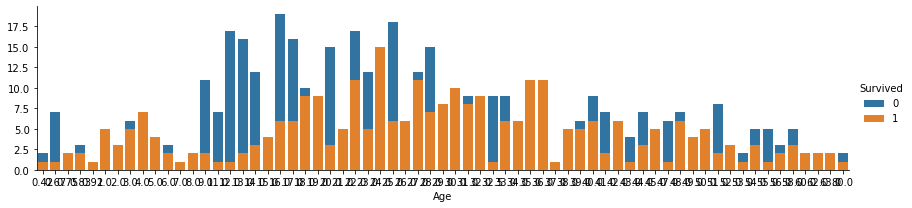

In [155]:
# distribution of age.
fig = sns.FacetGrid(train_df, hue="Survived",aspect=4)
fig.map(sns.countplot,'Age')

fig.add_legend()